In [ ]:
#importando biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import pylab as py 
import scipy as sp
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Tratamento dos dados

In [ ]:
#lendo os dados
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_excel("/content/drive/My Drive/Faculdade/Faculdade/Periodos/9º periodo/Ast/MICRODADOS.xlsx")

Mounted at /content/drive


In [ ]:
#filtrando os dados por Recife
dados_recife = data[data["MUNICIPIO"] ==  "RECIFE"]
dados_recife.shape

(2404, 4)

In [ ]:
x = dados_recife[np.logical_and(dados_recife['Data'] <= "2020-05-30", dados_recife['Data'] >= "2020-04-16")]
x2 = x.loc[:, ['Data', 'Total']]
x2 = x2.set_index('Data')

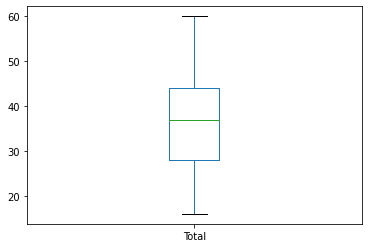

In [ ]:
boxplot = x2.boxplot(column=['Total'], grid=False)

In [ ]:
x2.describe()

,Total
count,45.000000
mean,36.844444
std,10.117392
min,16.000000
25%,28.000000
50%,37.000000
75%,44.000000
max,60.000000


In [ ]:
x1.describe()

,Total
count,45.000000
mean,89.311111
std,16.289738
min,50.000000
25%,82.000000
50%,92.000000
75%,101.000000
max,125.000000


Atividade 2

O teste de hipótese será focado se a média de crimes contra o patrimônio  no período de quarentena rígida em comparação com o mesmo periódo do ano em relação aos outros anos alterou.

Assim:

**H0**: média(x2) - média(x1) = 0

**H1**: média(x2) - média(x1) != 0



In [ ]:
#criando x2 e x1
#x2 periodo entre o inicio e o fim da quarentena no ano de 2020
#x1 periodo entre o inicio e o fim da quarentena no ano de 2019

x2 = dados_recife[np.logical_and(dados_recife['Data'] <= "2020-05-30", dados_recife['Data'] >= "2020-04-16")]
x1 = dados_recife[np.logical_and(dados_recife['Data'] <= "2019-05-30", dados_recife['Data'] >= "2019-04-16")]

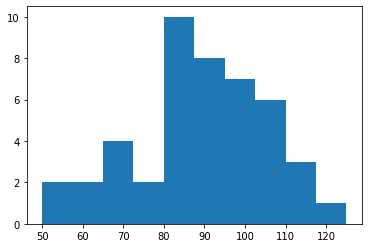

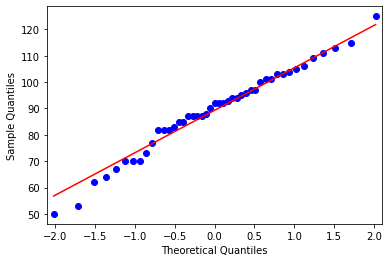

In [ ]:
#testando a normalidade (histograma e qqplot) de x1
plt.hist(x1["Total"])
sm.qqplot(x1["Total"], line="s")
plt.show()
#Aparentemente o x1 segue uma distruibuição normal, com alguns outliers

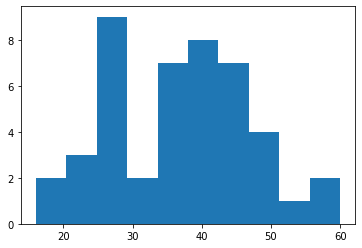

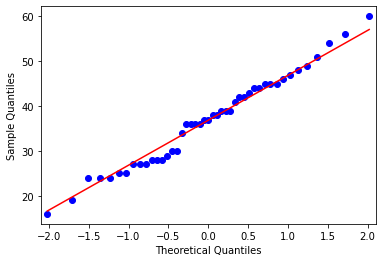

In [ ]:
#testando a normalidade (histograma e qqplot) de x2
plt.hist(x2["Total"])
sm.qqplot(x2["Total"], line="s")
plt.show()
#Aparentemente o x2 segue uma distruibuição normal, com alguns outliers

In [ ]:
#teste levene para testar se as variâncias são iguais
sp.stats.levene(x1['Total'], x2['Total'], center = 'mean')
#p-value abaixo de 0.05, então podemos rejeitar a hipótese nula de que as variâncias são iguais, logo podems afirmar com 95% de certeza que as variâncias 
#diferem

LeveneResult(statistic=7.3032359007749275, pvalue=0.00832699979184633)

In [ ]:
#teste-t para duas amostras independentes 

sp.stats.ttest_ind(x2['Total'], x1['Total'], equal_var=False)


Ttest_indResult(statistic=-17.72958702225097, pvalue=1.939199328786754e-27)

Portanto como é possível ver com o teste t, nossas médias das amostras diferem no mesmo periodo, de uma quarentena rígida em Recife.

**Atividade 4**


In [ ]:
#importando as bibliotecas
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
x = dados_recife[np.logical_and(dados_recife['Data'] < "2020-05-30", dados_recife['Data'] > "2020-04-16")]
x2 = x.loc[:, ['Data', 'Total']]
x2 = x2.set_index('Data')

In [ ]:
x2.shape #43 observações

(43, 1)

Text(0, 0.5, 'Crimes contra patrimônio')

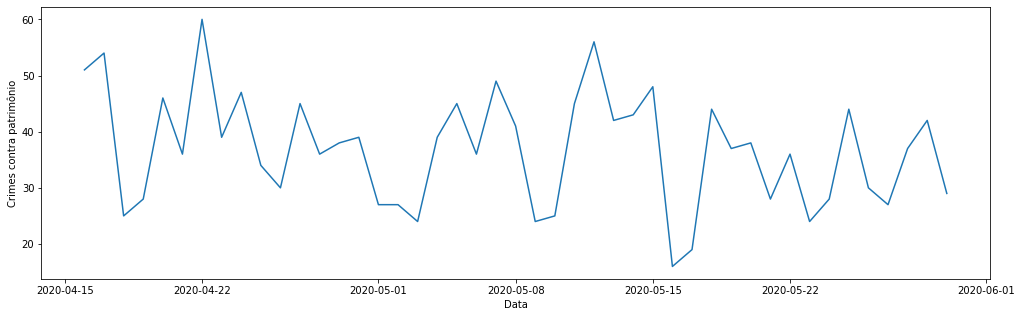

In [ ]:
#visualização gráfica
plt.figure(figsize=(17,5))
plt.plot(x2['Data'], x2['Total'])
plt.xlabel("Data")
plt.ylabel("Crimes contra patrimônio")
#Épossível ver que nossos dados aparentemente não tem tendência, porém tem uma sazonalidade aditiva

Para comprovar ainda, vamos decompor a série temporal em nível, tendência, sazonalidade e error

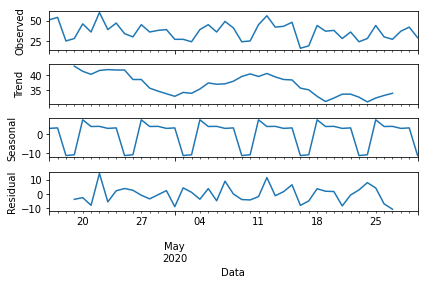

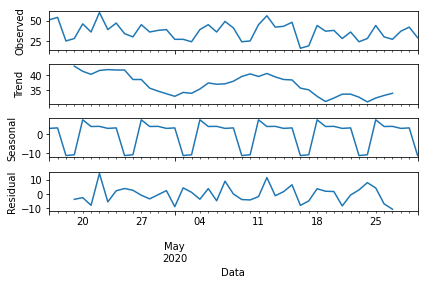

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x2, model='additive')
result.plot()
#Como é visto, não tendência clara nos dados

Suaviação Exponencial Simples


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


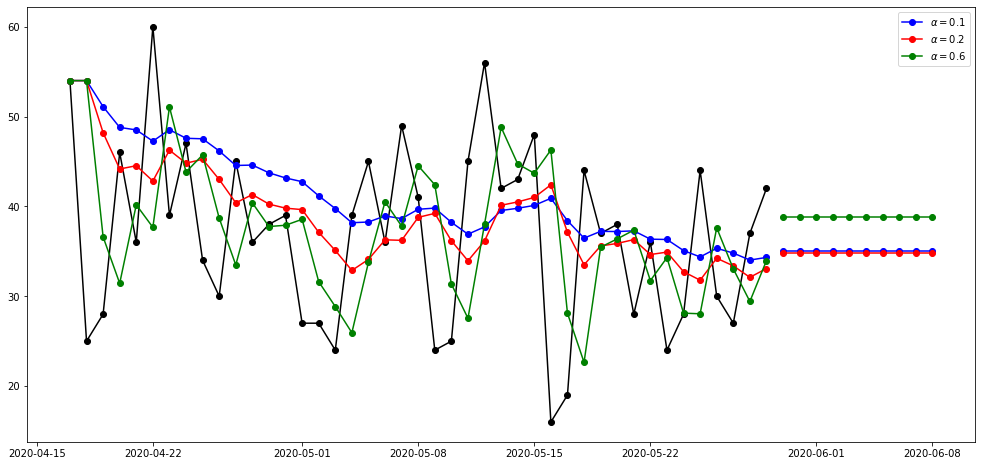

In [ ]:
fit1 = SimpleExpSmoothing(x2).fit(smoothing_level=0.1,optimized=False)
fcast1 = fit1.forecast(10).rename(r'$\alpha=0.1$')
fit2 = SimpleExpSmoothing(x2).fit(smoothing_level=0.2,optimized=False)
fcast2 = fit2.forecast(10).rename(r'$\alpha=0.2$')
fit3 = SimpleExpSmoothing(x2).fit(smoothing_level=0.6, optimized=False) 
fcast3 = fit3.forecast(10).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(17, 8))
plt.plot(x2, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [ ]:
#comparando o AIC
fit = [fit1, fit2, fit3]
for i in fit:
  print(i.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                   43
Model:             SimpleExpSmoothing   SSE                           5717.507
Optimized:                      False   AIC                            214.274
Trend:                           None   BIC                            217.796
Seasonal:                        None   AICC                           215.326
Seasonal Periods:                None   Date:                 Tue, 06 Oct 2020
Box-Cox:                        False   Time:                         01:18:12
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1000000                alpha                False
initial_level              54.000000                

In [ ]:
previsao =  [fcast1, fcast2, fcast3]
for i in previsao:
  print(i)

2020-05-30    35.089772
2020-05-31    35.089772
2020-06-01    35.089772
2020-06-02    35.089772
2020-06-03    35.089772
2020-06-04    35.089772
2020-06-05    35.089772
2020-06-06    35.089772
2020-06-07    35.089772
2020-06-08    35.089772
Freq: D, Name: $\alpha=0.1$, dtype: float64
2020-05-30    34.867578
2020-05-31    34.867578
2020-06-01    34.867578
2020-06-02    34.867578
2020-06-03    34.867578
2020-06-04    34.867578
2020-06-05    34.867578
2020-06-06    34.867578
2020-06-07    34.867578
2020-06-08    34.867578
Freq: D, Name: $\alpha=0.2$, dtype: float64
2020-05-30    34.708188
2020-05-31    34.708188
2020-06-01    34.708188
2020-06-02    34.708188
2020-06-03    34.708188
2020-06-04    34.708188
2020-06-05    34.708188
2020-06-06    34.708188
2020-06-07    34.708188
2020-06-08    34.708188
Freq: D, Name: $\alpha=0.15$, dtype: float64



Suavização Exponencial de Holt (com e sem amortecimento)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


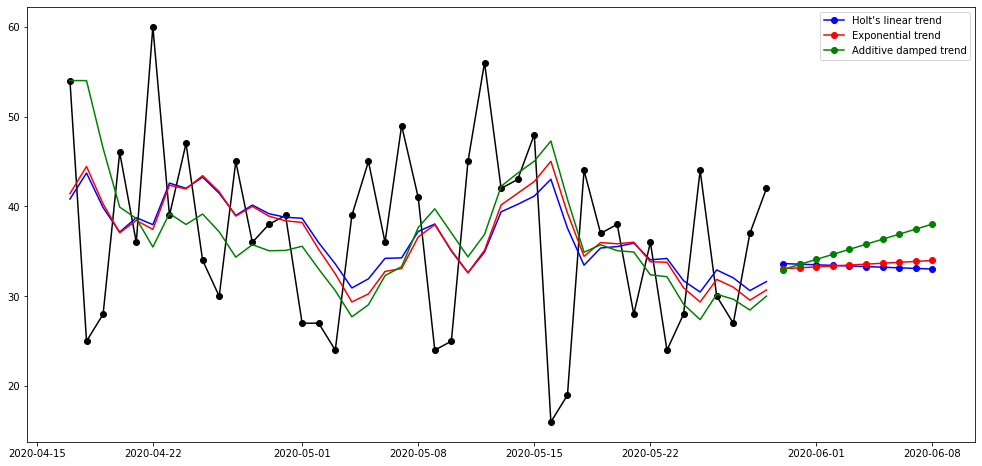

In [ ]:
#como nossa serie temporal não tem tendência, apenas sazonalidade, colocamos damped como falso.
holt1 = Holt(x2,  damped=False).fit(smoothing_level=0.2, smoothing_slope=0.1)
fcast1 = holt1.forecast(10).rename("Holt's linear trend")
holt2 = Holt(x2,  damped=False).fit(smoothing_level=0.2, smoothing_slope=0.2)
fcast2 = holt2.forecast(10).rename("Exponential trend")
holt3 = Holt(x2, damped=False).fit(smoothing_level=0.2, smoothing_slope=0.3)
fcast3 = holt3.forecast(10).rename("Additive damped trend")

plt.figure(figsize=(17, 8))
plt.plot(x2, marker='o', color='black')
plt.plot(holt1.fittedvalues, color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(holt2.fittedvalues, color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(holt3.fittedvalues, color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [ ]:
previsao =  [fcast1, fcast2, fcast3]
for i in previsao:
  print(i)

2020-05-30    33.636536
2020-05-31    33.568842
2020-06-01    33.501147
2020-06-02    33.433453
2020-06-03    33.365758
2020-06-04    33.298064
2020-06-05    33.230369
2020-06-06    33.162675
2020-06-07    33.094981
2020-06-08    33.027286
Freq: D, Name: Holt's linear trend, dtype: float64
2020-05-30    33.061045
2020-05-31    33.162950
2020-06-01    33.264855
2020-06-02    33.366761
2020-06-03    33.468666
2020-06-04    33.570571
2020-06-05    33.672476
2020-06-06    33.774382
2020-06-07    33.876287
2020-06-08    33.978192
Freq: D, Name: Exponential trend, dtype: float64
2020-05-30    32.973155
2020-05-31    33.534936
2020-06-01    34.096717
2020-06-02    34.658499
2020-06-03    35.220280
2020-06-04    35.782062
2020-06-05    36.343843
2020-06-06    36.905624
2020-06-07    37.467406
2020-06-08    38.029187
Freq: D, Name: Additive damped trend, dtype: float64


In [ ]:
#comparando o AIC, quanto menor ele for, melhor é o modelo
fit = [holt1, holt2, holt3]
for i in fit:
  print(i.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   43
Model:                           Holt   SSE                           5026.415
Optimized:                       True   AIC                            212.734
Trend:                       Additive   BIC                            219.779
Seasonal:                        None   AICC                           215.068
Seasonal Periods:                None   Date:                 Tue, 06 Oct 2020
Box-Cox:                        False   Time:                         02:31:50
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
smoothing_slope            0.1000000                

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


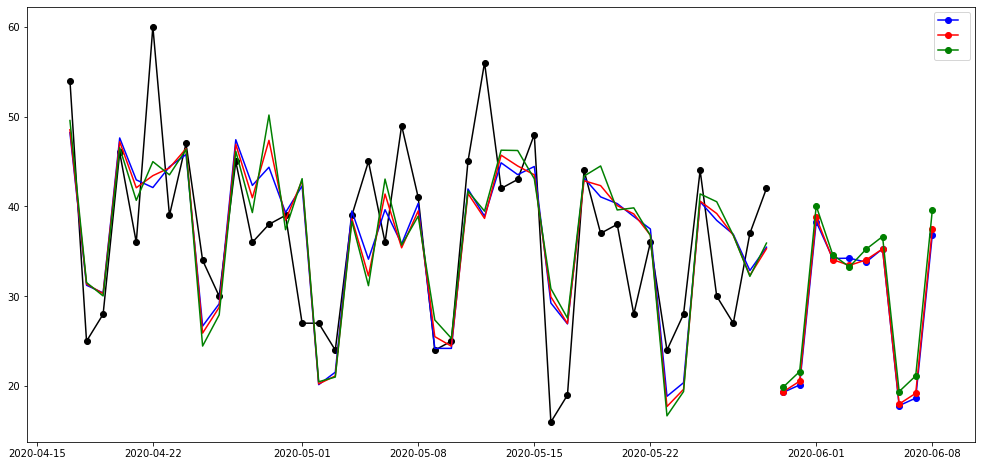

In [ ]:
#Método de holt-winters
#Nós temos uma série temporal sem tendência, mas com uma sazonalidade aditiva, então definimos o periodo sazonal como 7 que é a duração de uma semana
#pegaremos os pmelhores parâmetros dos métodos anteriores para testar

hot_w1 = ExponentialSmoothing(x2, seasonal_periods=7, trend='mul', seasonal='add', damped=False).fit(smoothing_level=0.2, smoothing_slope=0.1, smoothing_seasonal = 0.1)
fcast1 = hot_w1.forecast(10)
hot_w2 = ExponentialSmoothing(x2, seasonal_periods=7, trend='mul', seasonal='add', damped=False).fit(smoothing_level=0.2, smoothing_slope=0.1, smoothing_seasonal = 0.2)
fcast2 = hot_w2.forecast(10)
hot_w3 = ExponentialSmoothing(x2, seasonal_periods=7, trend='mul', seasonal='add', damped=False).fit(smoothing_level=0.2, smoothing_slope=0.1, smoothing_seasonal = 0.3)
fcast3 = hot_w3.forecast(10)

plt.figure(figsize=(17, 8))
plt.plot(x2, marker='o', color='black')
plt.plot(hot_w1.fittedvalues, color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(hot_w2.fittedvalues, color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(hot_w3.fittedvalues, color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [ ]:
previsao =  [fcast1, fcast2, fcast3]
for i in previsao:
  print(i)

2020-05-30    19.297452
2020-05-31    20.126870
2020-06-01    38.288452
2020-06-02    34.201451
2020-06-03    34.236415
2020-06-04    33.795540
2020-06-05    35.283344
2020-06-06    17.824846
2020-06-07    18.664073
2020-06-08    36.835397
Freq: D, dtype: float64
2020-05-30    19.357150
2020-05-31    20.542416
2020-06-01    38.772865
2020-06-02    34.073069
2020-06-03    33.434590
2020-06-04    34.038599
2020-06-05    35.268702
2020-06-06    18.005959
2020-06-07    19.199459
2020-06-08    37.438092
Freq: D, dtype: float64
2020-05-30    19.871876
2020-05-31    21.616814
2020-06-01    40.042285
2020-06-02    34.605033
2020-06-03    33.269341
2020-06-04    35.222846
2020-06-05    36.647703
2020-06-06    19.392298
2020-06-07    21.140923
2020-06-08    39.570052
Freq: D, dtype: float64


In [ ]:
#comparando o AIC, quanto menor ele for, melhor é o modelo
fit = [holt1, holt2, holt3]
for i in fit:
  print(i.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   43
Model:                           Holt   SSE                           5026.415
Optimized:                       True   AIC                            212.734
Trend:                       Additive   BIC                            219.779
Seasonal:                        None   AICC                           215.068
Seasonal Periods:                None   Date:                 Tue, 06 Oct 2020
Box-Cox:                        False   Time:                         02:36:38
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
smoothing_slope            0.1000000                

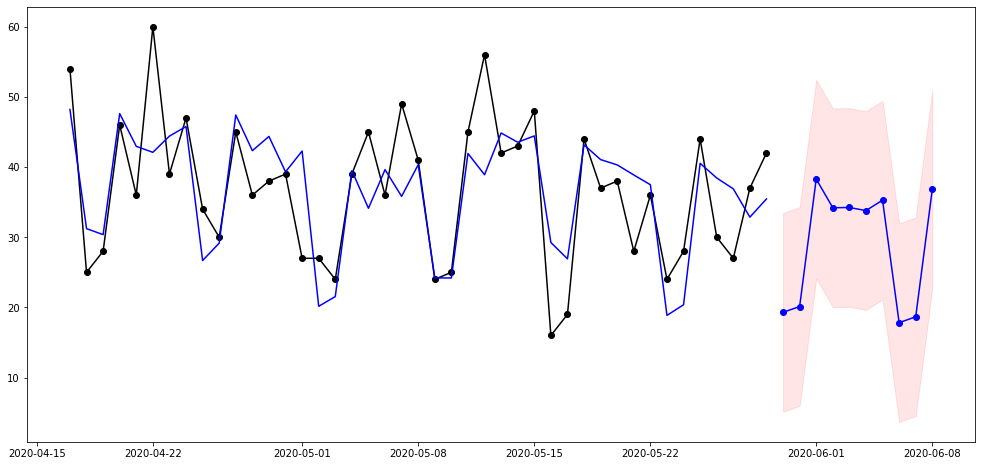

In [ ]:
#criando o intervalo de confiança
xhat = fcast1
z = 1.96
sse = hot_w1.sse
predint_xminus = xhat - z * np.sqrt(sse/len(x2))
predint_xplus  = xhat + z * np.sqrt(sse/len(x2))

plt.figure(figsize=(17, 8))
plt.plot(x2, marker='o', color='black')
plt.plot(hot_w1.fittedvalues, color='blue')

plt.fill_between(fcast1.index, predint_xminus, predint_xplus, color='red', alpha=.1)
line1, = plt.plot(fcast1, marker='o', color='blue')

Atividade 5


In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

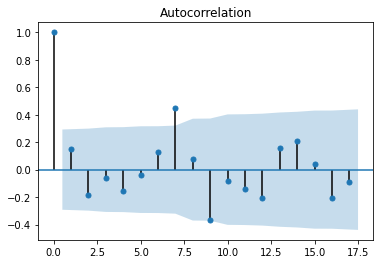

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.14852726, -0.18328355, -0.06453288, -0.15269374,
       -0.03864515,  0.13099463,  0.45022784,  0.07603904, -0.36922379,
       -0.07973262, -0.13770243, -0.20414882,  0.1586564 ,  0.20830664,
        0.0428796 , -0.20982959, -0.0873587 ,  0.04057905, -0.09225902,
        0.18605174,  0.30350477,  0.01756027, -0.13880797, -0.14277533,
        0.0506117 ,  0.02873892,  0.00203083,  0.20523649, -0.08238064,
       -0.19343517, -0.08687637, -0.00258957, -0.00546652, -0.0528184 ,
        0.00200265, -0.06885966, -0.07672487, -0.00419082,  0.03395337,
       -0.08548894, -0.02850187,  0.04075602, -0.01367612])

In [ ]:
plot_acf(x2) #note que se não colocarmos todos os pontos como lags, ele mostrara apenas aquelas que ultrapassa o IC
pyplot.show()
coef_acf = acf(x2, nlags=43)
coef_acf

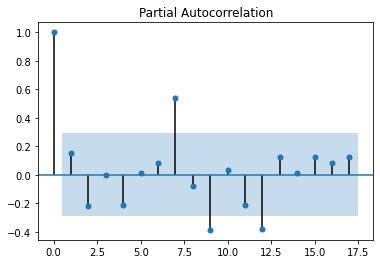

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


array([ 1.00000000e+00,  1.51902880e-01, -2.19958281e-01, -1.99079600e-04,
       -2.11833422e-01,  9.91916732e-03,  8.44223048e-02,  5.37003800e-01,
       -8.08960089e-02, -3.87321897e-01,  3.58585423e-02, -2.09495834e-01,
       -3.80546012e-01,  1.23566353e-01,  1.27657858e-02,  1.24899906e-01,
        8.25333042e-02,  1.23020619e-01,  1.77144280e-01,  9.18940164e-02,
        1.78034124e-01,  3.86536620e-01,  1.49589826e-01, -3.38515135e-01,
       -7.79845301e-01, -5.03777125e-01, -6.74198322e-01, -6.22180918e+00,
        9.25996063e-01,  7.74653612e-02,  7.39754509e-01, -2.30705791e+00,
       -6.29836488e-01, -1.52414914e-01, -6.15421999e-01, -2.71125096e+00,
        7.35715529e-01, -2.67555184e-01,  1.98650663e+00,  1.06734640e+00,
        6.10789938e+00, -1.29480376e+00, -8.26542261e-01, -8.92891611e-01])

In [ ]:
plot_pacf(x2)
pyplot.show()
coef_pacf = pacf(x2, nlags=43)
coef_pacf

In [ ]:
model = ARIMA(x2, order=(3,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Total   No. Observations:                   43
Model:                     ARMA(3, 0)   Log Likelihood                -158.716
Method:                       css-mle   S.D. of innovations              9.690
Date:                Fri, 09 Oct 2020   AIC                            327.432
Time:                        00:43:22   BIC                            336.238
Sample:                    04-17-2020   HQIC                           330.679
                         - 05-29-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          36.7266      1.407     26.097      0.000      33.968      39.485
ar.L1.Total     0.1456      0.158      0.922      0.362      -0.164       0.455
ar.L2.Total    -0.1881      0.158     -1.188    

In [ ]:
model = ARIMA(x2, order=(2,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Total   No. Observations:                   43
Model:                     ARMA(2, 0)   Log Likelihood                -158.721
Method:                       css-mle   S.D. of innovations              9.691
Date:                Fri, 09 Oct 2020   AIC                            325.442
Time:                        01:04:02   BIC                            332.487
Sample:                    04-17-2020   HQIC                           328.040
                         - 05-29-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          36.7249      1.427     25.730      0.000      33.927      39.522
ar.L1.Total     0.1481      0.156      0.949      0.348      -0.158       0.454
ar.L2.Total    -0.1909      0.156     -1.226    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


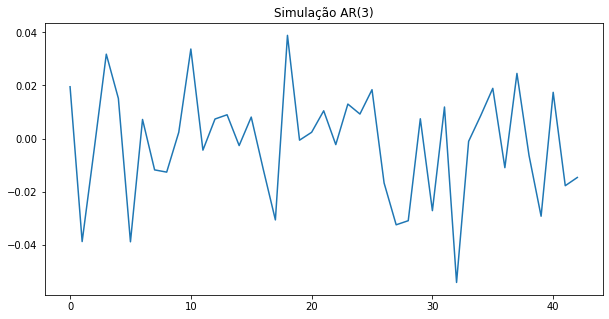

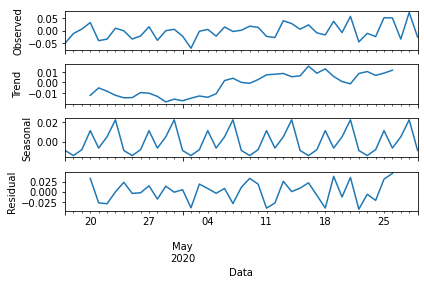

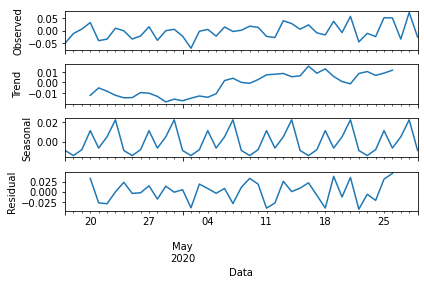

In [ ]:
#simulação 1
ar3_2 = np.array([31.7266, 0.0456, -0.2881, -0.1161])
ma = np.array([1])

simulated_AR3_2_data = ArmaProcess(ar3_2,ma).generate_sample(nsample=43) #43 amostras
plt.figure(figsize=(10, 5))
plt.plot(simulated_AR3_data)
plt.title("Simulação AR(3)")
plt.show()

simulated_AR3_2 = pd.Series(simulated_AR3_2_data, index = x2.index)
decomp1 = seasonal_decompose(simulated_AR3_2, model='additive')
decomp1.plot()

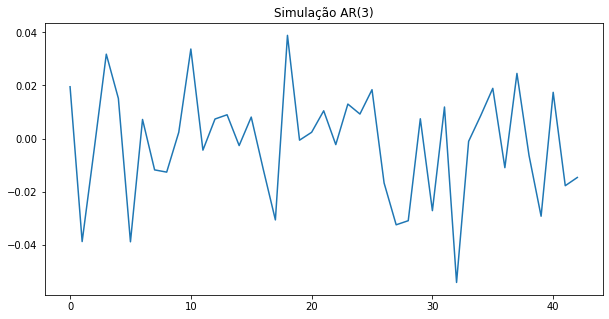

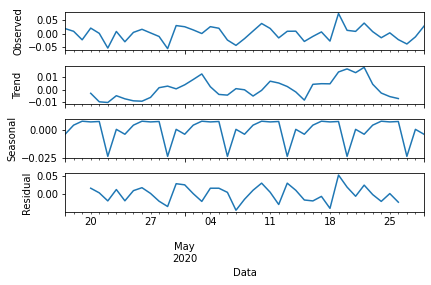

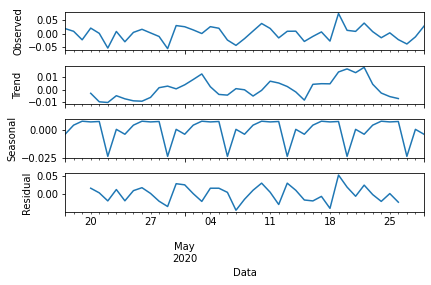

In [ ]:
#simulação 2
ar3_2 = np.array([36.7266, 0.1456, -0.1881, -0.0161])
ma = np.array([1])

simulated_AR3_2_data = ArmaProcess(ar3_2,ma).generate_sample(nsample=43) #43 amostras
plt.figure(figsize=(10, 5))
plt.plot(simulated_AR3_data)
plt.title("Simulação AR(3)")
plt.show()

simulated_AR3_2 = pd.Series(simulated_AR3_2_data, index = x2.index)
decomp1 = seasonal_decompose(simulated_AR3_2, model='additive')
decomp1.plot()


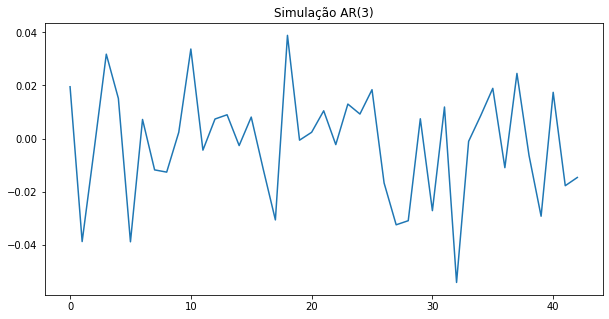

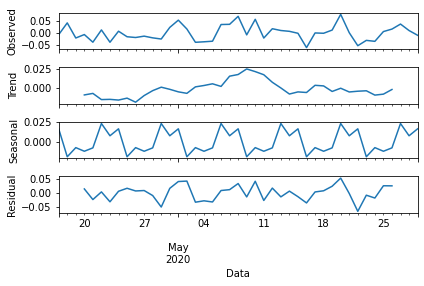

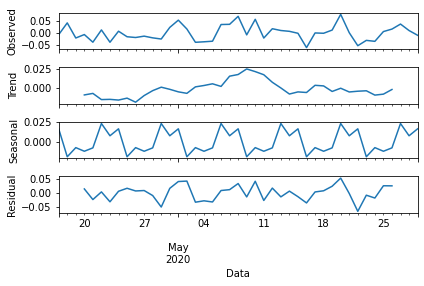

In [ ]:
#simulação 3
ar3_2 = np.array([41.7266, 0.2456, -0.0881, 9.9839])
ma = np.array([1])

simulated_AR3_2_data = ArmaProcess(ar3_2,ma).generate_sample(nsample=43) #43 amostras
plt.figure(figsize=(10, 5))
plt.plot(simulated_AR3_data)
plt.title("Simulação AR(3)")
plt.show()

simulated_AR3_2 = pd.Series(simulated_AR3_2_data, index = x2.index)
decomp1 = seasonal_decompose(simulated_AR3_2, model='additive')
decomp1.plot()


Atividade 6


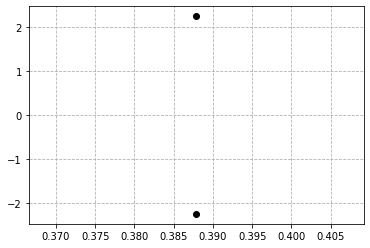

In [ ]:
#plotando o circulo unitário com as raízes encontradas
#x1 = 0.38789 + 2.25563i
#x2 = 0.38789 - 2.25563i
#lembrando que o no caso do python, elas precisam estar fora do circulo unitário
plt.plot(0.38789, 2.25563, 'o', color='black')
plt.plot(0.38789, -2.25563, 'o', color='black')

plt.grid(linestyle='--')

plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
#tratamento dos dados
x = dados_recife[np.logical_and(dados_recife['Data'] < "2020-05-30", dados_recife['Data'] > "2020-04-16")]
x2 = x.loc[:, ['Total']]
a = x2.values
b = a.ravel()

result = adfuller(b)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#não é estacionário, bate com oque foi visto no gráfico

ADF Statistic: -2.462604
p-value: 0.124840


Atividade 7

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

                              ARMA Model Results                              
Dep. Variable:                  Total   No. Observations:                   43
Model:                     ARMA(0, 2)   Log Likelihood                -158.067
Method:                       css-mle   S.D. of innovations              9.521
Date:                Thu, 12 Nov 2020   AIC                            324.133
Time:                        22:58:20   BIC                            331.178
Sample:                    04-17-2020   HQIC                           326.731
                         - 05-29-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          36.6776      1.276     28.753      0.000      34.177      39.178
ma.L1.Total     0.1898      0.154      1.230      0.226      -0.113       0.492
ma.L2.Total    -0.3235      0.180     -1.801    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'Modelo de média móvel')

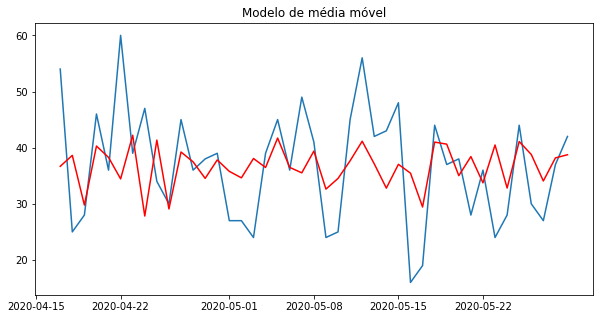

In [ ]:
model = ARIMA(x2, order=(0,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())
plt.figure(figsize=(10, 5))
plt.plot(x2)
plt.plot(model_fit.fittedvalues, color = 'red')
plt.title("Modelo de média móvel")
#ma.L1.Total     0.1898, ma.L2.Total    -0.3235

In [ ]:
#teste para de raiz unitária
#não achei um código que testasse como foi testado em sala de aula
def unit_test_root(root1, root2):
  if -1 < root2 and root2 < 1 and (root1 + root2) > -1 and (root1 - root2) < 1:
    return True
  else:
    return False

In [ ]:
unit_test_root(0.1898,-0.3235)
#invertível

True

O teste ADF deu que o conjunto de dados não é estacionário 

Atividade 8

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

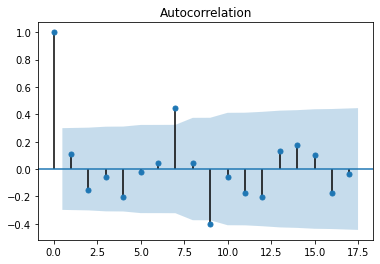

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


array([ 1.        ,  0.10901193, -0.15541746, -0.05717508, -0.20541505,
       -0.0252495 ,  0.04470361,  0.44678004,  0.04456729, -0.39929796,
       -0.05982641, -0.17359723, -0.20139808,  0.13154813,  0.17603049,
        0.09954184, -0.17795468, -0.03946906,  0.07148403, -0.11052869,
        0.17851132,  0.25802214,  0.01220916, -0.08229273, -0.11345495,
        0.04123984, -0.03054399, -0.03966264,  0.17847051, -0.14371087,
       -0.13200326, -0.03013082, -0.0279864 ,  0.00867652, -0.07250051,
        0.0268934 , -0.05134449, -0.03407663,  0.06794387,  0.01043353,
       -0.05127167, -0.01339142,  0.02163194])

In [ ]:
#ACF
plot_acf(x2) 
pyplot.show()
coef_acf = acf(x2, nlags=43)
coef_acf

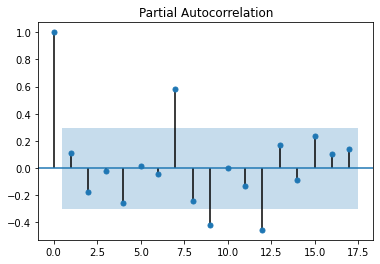

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1350: RuntimeWarning: invalid value encountered in double_scalars
  r[k] = (X[0:-k] * X[k:]).sum() / denom(k)


array([ 1.00000000e+00,  1.11607453e-01, -1.77668096e-01, -2.11321021e-02,
       -2.56065189e-01,  1.80038004e-02, -4.18537238e-02,  5.78998941e-01,
       -2.45135492e-01, -4.20710122e-01, -1.04107228e-04, -1.33035549e-01,
       -4.54698606e-01,  1.70793032e-01, -9.08669203e-02,  2.33161836e-01,
        1.06510546e-01,  1.43940912e-01,  1.42139638e-01,  2.31710745e-01,
        1.69538729e-04,  4.65120988e-01, -3.15592691e-01, -1.54641554e-01,
       -6.88755574e-01,  7.42728147e-01, -3.84799067e+00, -9.95941310e-01,
       -3.76718650e+00, -1.25908564e+00,  3.67159548e+01,  1.00254815e+00,
        5.57410338e-01,  3.11052651e-01, -7.56841301e-01,  3.54645438e+00,
        6.76231189e-01, -7.28854743e-02,  4.48832141e-01, -2.10383702e+00,
       -4.42744067e-01, -5.16759305e-01, -1.09177571e+00,             nan])

In [ ]:
#PACF
plot_pacf(x2)
pyplot.show()
coef_pacf = pacf(x2, nlags=43)
coef_pacf

In [ ]:
model = ARIMA(x2, order=(3,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  Total   No. Observations:                   43
Model:                     ARMA(3, 2)   Log Likelihood                -157.613
Method:                       css-mle   S.D. of innovations              9.206
Date:                Wed, 25 Nov 2020   AIC                            329.225
Time:                        17:36:35   BIC                            341.554
Sample:                    04-17-2020   HQIC                           333.772
                         - 05-29-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          36.6076      1.587     23.068      0.000      33.497      39.718
ar.L1.Total    -1.3435      0.929     -1.446      0.156      -3.164       0.477
ar.L2.Total    -0.4616      0.761     -0.607    

In [ ]:
arma_t = ArmaProcess(model_fit.arparams, model_fit.maparams)
print(arma_t.isinvertible)
print(arma_t.isstationary)

True
True


Text(0.5, 1.0, 'Modelo autoregressivo com média móvel')

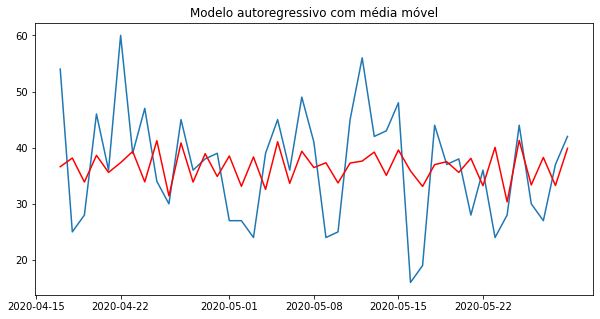

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x2)
plt.plot(model_fit.fittedvalues, color = 'red')
plt.title("Modelo autoregressivo com média móvel")